Project: Investigate a Dataset - [TMDB MOVIE DATA]

INTRODUCTION

This data set contains information of about 10,000 movies collected from The Movie Database (TMDb),including user ratings 
and revenue. Columns such as popularity,budget,revenue,cast,genres,release_year,vote_average can help answer questions like
predicting movies that are most popular/highly rated?, which genres of movies from the dataset has been worked on more from year to year?,does the number of movies a certain Director has worked on determine how popular/succesful his movie can be?.


In [1]:
#lets import our packages to use in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA WRANGLING

To gather,assess and clean our datasets

In [7]:
#load dataset
df_md = pd.read_csv('tmdb-movies.csv')

df_md.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


Here,the first five rows of our Datasets above with their columns in view gives 
us more coverage to learn more about the dataset

In [8]:
df_md.shape

(10866, 21)

the shape function tells us our dataset is made of 10866 rows and 21 columns ,some columns that are not needed have to be dropped to make my dataset have more integrity and less bulky

In [9]:
df_md.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

with the unique years in view,we can base analysis from 2010 to 2015 for the latest trend in 5 years, but lets see as 
we go on wrangling data

In [10]:
df_md.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
df_md.drop(['imdb_id','homepage','tagline','keywords','overview'], axis = 1, inplace = True)

As we observed from the dataset with shape function,we have 21 columns and have to drop columns 
that won't be relevant to the questions and conclusions

In [66]:
#confirm changes i've made
df_md

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [12]:
df_md.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

after dropping unrelevant/erraneous columns ;next is cleaning method of Missing values in some of our columns.columns
such as genres,cast, director has missing values and we need to treat and clean them.
i also noticed in Budget,  we have some rows that are with 0 budget, this might imply that the movie is a no budget movie
safe to say , no revenue as well

In [68]:
df_md.fillna('Anonymous', inplace = True)

Take note that all missing values occur in all the text(string) columms
implying we might likely have to fillna with a string, in this case Anonymous so as not remove any row with vital info.

In [69]:
#change the d.type of release_date and release_year to datetime
df_md['release_date'] = pd.to_datetime(df_md['release_date'])
df_md['release_year'] = pd.to_datetime(df_md['release_year'])


Incorrect datatype was also plaguing our dataset, columns release_year and release_date were all in string (object) format
and this needed to be converted(cleaned) to a datetime format to help in our Data Exploration or conclusion

In [70]:
#DEdupe Data
#need to know if theres any duplicate row
df_md.duplicated().sum()

#drop duplicate
df_md.drop_duplicates(inplace = True)

#confirm changes you've made
df_md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10865 non-null  object        
 6   director              10865 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10865 non-null  object        
 9   production_companies  10865 non-null  object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

To check if there are rows that are identical completely, if True, one or two of the rows had to be dropped 
making it easy for us to draw insight from the dataset.In a nutshell, remove duplicated rows .

EXPLORING DATA WITH VISUALS

Here, we find patterns in our dataset,build intuition about our work
and visualise relataionship in our data

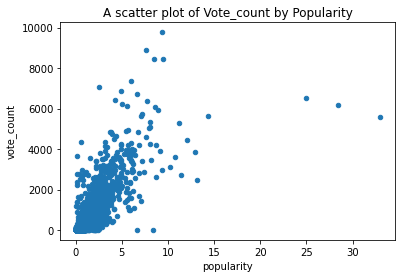

In [14]:
df_md.plot(x='popularity',y='vote_count',kind='scatter');
plt.title('A scatter plot of Vote_count by Popularity');


exploring with visuals to see if there is a positive correlation with popularity column and vote_count column,
in addition this is a scatter plot that helped show relationship between 2 variables , and from the viz we 
can depict that there was somewhat a positive correlation between popularity and vote_count

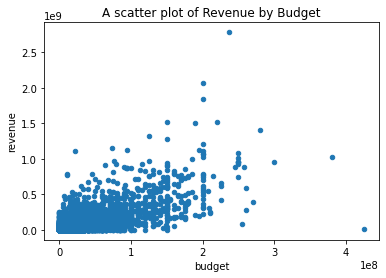

In [15]:
df_md.plot(x='budget',y='revenue',kind='scatter');
plt.title('A scatter plot of Revenue by Budget');

the viz, Revenue by Budget tried to also ask if both variables are correlated.this help explain why some rows that 
were with zero budget had zero Revenue.

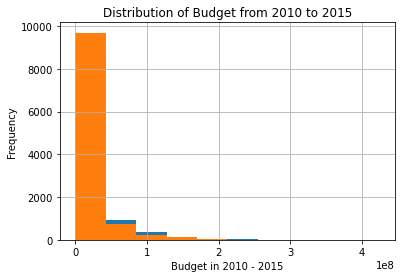

In [25]:
#How has the distribution of budget from 2010 to the current year changed due to inflation
df_md.budget_adj.hist();
df_md.budget.hist();
plt.title('Distribution of Budget from 2010 to 2015')
plt.xlabel('Budget in 2010 - 2015');
plt.ylabel('Frequency');
plt.show()

In [ ]:
The distribution is skewed to the right during the years considered .

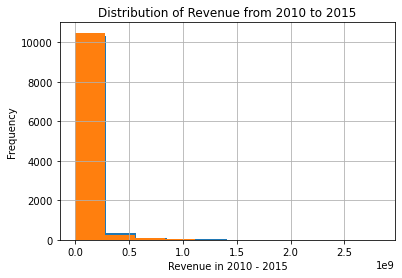

In [24]:
#How has the distribution of revenue from 2010 to the current year changed due to inflation as well
df_md.revenue_adj.hist();
df_md.revenue.hist();
plt.title('Distribution of Revenue from 2010 to 2015')
plt.xlabel('Revenue in 2010 - 2015');
plt.ylabel('Frequency');
plt.show()

Here also,throughout the years considered ,Revenue takes the same path as Budget,the
distribution positively skewed to the right.

DRAWING CONCLUSIONS

Lets address our initial questions and predict the scenario that might happen!!

In [75]:
df_md.nunique()

id                      10865
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10720
director                 5068
runtime                   247
genres                   2040
production_companies     7446
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Predicting movies that are most popular/highly rated!!!

In [76]:
df_hr = df_md.nlargest(5, columns= ['popularity'])

using nlargest function to get the highly rated/most popular movie by popularity
according to tmdb,they calculate their popular movies through votes submitted by their users(vote_average)

In [77]:
df_hr

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,137999939.3,3.481613e+08
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,1970-01-01 00:00:00.000002014,151980023.4,5.726906e+08
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,1970-01-01 00:00:00.000002014,156585478.6,7.122911e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015,101199955.5,2.716190e+08


In [17]:
#selecting our columns to plot

df_hr.iloc[: , np.r_[1,4]]

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent


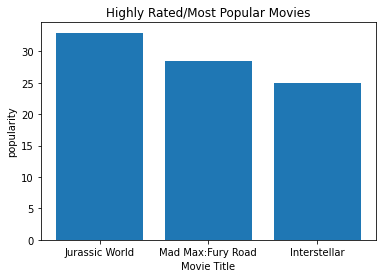

In [18]:
plt.bar([1, 2, 3],[32.985763, 28.419936, 24.949134])
plt.xticks([1, 2, 3],['Jurassic World','Mad Max:Fury Road','Interstellar']);
plt.title('Highly Rated/Most Popular Movies');
plt.ylabel('popularity')
plt.xlabel('Movie Title')
plt.show()

Due to genre mixing(bending)being common nowadays, which genres of movies have film makers worked on more for years?,
knowing fully well more of making these genres might increase the users fondness to these genres

In [19]:
df_gc = df_md.genres.value_counts()
df_g = df_gc.to_frame()
df_g

,genres
Comedy,712
Drama,712
Documentary,312
Drama|Romance,289
Comedy|Drama,280
...,...
Adventure|Animation|Romance,1
Family|Animation|Drama,1
Action|Adventure|Animation|Comedy|Family,1
Action|Adventure|Animation|Fantasy,1


initially i wanted to base my analysis for this Research question from 2010 to 2015 to help streamline my prediction, 
but value_counts function helped to aggregate the unique Genres of movies from the year 1966 to 2015 as shown above.

In [20]:
df = df_g.nlargest(10,columns = ['genres'])

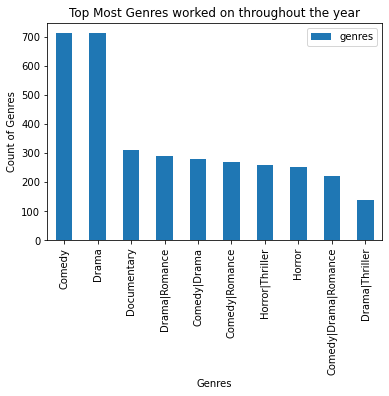

In [22]:
df.plot(kind = 'bar')
plt.title('Top Most Genres worked on throughout the year')
plt.ylabel('Count of Genres')
plt.xlabel('Genres')
plt.show()

From the viz above; Genre mix - Drama/Romance,Comedy/Drama can be seen to be high produced genres throughout the year .
For sure,most viewers love to laugh and 'Comedy' genre is popular among film-makers.

does the number of movies a certain Director has worked on determine how popular/succesful his movie can be?.

In [78]:
df_dc = df_md['director'].value_counts()
df_d = df_dc.to_frame()
df_d

,director
Woody Allen,45
Anonymous,44
Clint Eastwood,34
Martin Scorsese,29
Steven Spielberg,29
...,...
Jeffrey Porter,1
Larry Shaw,1
Bill Pohlad,1
Andy Hamilton|Guy Jenkin,1


In [79]:
#viz below shows us the director with the highest number of movies 
df1 = df_d.nlargest(4,columns = ['director'])

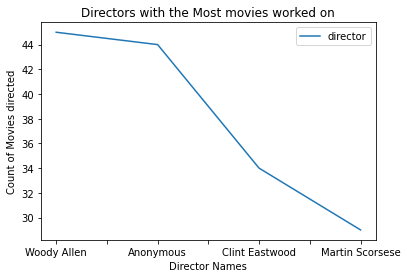

In [82]:
df1.plot(kind = 'line')
plt.title('Directors with the Most movies worked on')
plt.ylabel('Count of Movies directed')
plt.xlabel('Director Names')
plt.show()

Above,we plotted count of movies against top(4) Director names to try to ascertain that director that has worked on 
a high number of movies and do a comparison with the Director that produced the popular movie 'Jurassic World' 
which we got from our analysis.
The Comparison was made to actually check if the number of movies a director has produced is a neccessary factor in making
his movies successful or rated highly.This graph tells us this is not the case.

CONCLUSION(COMMUNICATING OUR RESULTS)

From the visualisation showing directors with the number of movies they have worked on, we observed that Director Woody Allen 
has a directed a lot of movies,but the most popular/highly rated movie - 'Jurassic World' which we got from our analysis was 
directed by a Colin Trevorrow.This gives us a little certainty to our question that irrespective of the number of movies a 
director has worked on,its not a guarantee that his movies will always be highly rated.
But notice the downward nature of the line graph,does this mean we have a lot of directors now making it more competitive 
out there for one Director to direct a lot of movies?.

The Most popular movies were measured with respect to popularity column owing to the fact that tmdb calculates their Popular
movies with the vote averages gotten from the vote counts of users.So having the highest rating for the popularity column,
shows the popularity of a movie which was 'Jurassic World','Mad Mx:Fury Road' and so on in thar order.

Which genre of movie has been produced more throughout?, Please note that Genre mixing is common in recent times and also help
to show case how creative a Director can be.Hence the reason why each definite genre were not seperated(split) when doing my
analysis.Notice how close Genre types 'Comedy' and 'Drama' are to each other as the top most genre of movies film-makers produce.
Also Genre mix; Drama/Romance,Comedy/Drama are also in the mix of high produced genres.One thing is certain, most viewers 
love to laugh and 'Comedy' genre is popular among film-makers.

LIMITATIONS


The missing values in most of the columns tried  to hinder my analysis for the Directors with Most movies
worked on as i had to fill the empty and missing rows with "Anonymous" which was seen on the viz.This signify 
no data was collected as to who produced some movies in the dataset and might as well have had an effect on the outcome of 
if Director Woody Allen actually had the highest movies made or worked on .Hence making the ASSERTION that highest 
number of movies directed by a director might actually make his movies highly rATED somewhat true.


LIST OF WEBSITES - www.stackoverflow.com